In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [5]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
X = iris.data
y = iris.target

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [19]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [20]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# K Nearest Neighbors

k: 1, Train+Test=Total Scores: 1.000+0.947=1.947
k: 3, Train+Test=Total Scores: 0.964+0.921=1.885
k: 5, Train+Test=Total Scores: 0.982+0.921=1.903
k: 7, Train+Test=Total Scores: 0.973+0.947=1.921
k: 9, Train+Test=Total Scores: 0.964+0.974=1.938
k: 11, Train+Test=Total Scores: 0.955+0.974=1.929
k: 13, Train+Test=Total Scores: 0.964+0.974=1.938
k: 15, Train+Test=Total Scores: 0.973+0.974=1.947
k: 17, Train+Test=Total Scores: 0.973+0.974=1.947
k: 19, Train+Test=Total Scores: 0.973+0.947=1.921


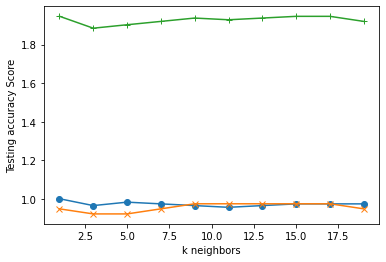

In [23]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
total_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    total_score = test_score + train_score
    train_scores.append(train_score)
    test_scores.append(test_score)
    total_scores.append(total_score)
    
    print(f"k: {k}, Train+Test=Total Scores: {train_score:.3f}+{test_score:.3f}={total_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.plot(range(1,20,2), total_scores, marker='+')
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [24]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.974


In [25]:
new_iris_data = [[4.3, 3.2, 1.3, 0.2]]
predicted_class = knn.predict(new_iris_data)
print(predicted_class)

[2]


Source: [Sklearn Nearest Neighbors](https://scikit-learn.org/stable/auto_examples/neighbors/plot_nca_classification.html)